Repo: https://github.com/nytimes/covid-19-data
<li> Calculate the total number of confirmed cases & deaths broken down by county for Connecticut
<li> Given the data that you calculate, present that visually any way. Note this homework is not going to be judging on UX design

In [2]:
"""
!pip install pandas 
!pip install plotly==3.10.0
"""

'\n!pip install pandas \n!pip install plotly==3.10.0\n'

In [3]:
# load libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load visualization library
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)

In [5]:
# load data
df = pd.read_csv('data/us-counties.csv')

In [6]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [7]:
connecticut_df = df[df.state == 'Connecticut']

In [8]:
print(f' Total number of records for state Connceticut: {connecticut_df.shape[0]}')

 Total number of records for state Connceticut: 251


In [9]:
# reset index
connecticut_df.reset_index(inplace=True)

In [10]:
# drop state we don't need it
connecticut_df.drop(columns=['state', 'index'], inplace=True)

In [11]:
# check data types
connecticut_df.dtypes

date       object
county     object
fips      float64
cases       int64
deaths      int64
dtype: object

### Total Number of Confirmed Cases & Deaths by County 

In [12]:
aggregated_df = connecticut_df[['county', 'cases', 'deaths']].groupby(['county']).max()

In [13]:
aggregated_df.head()

,cases,deaths
county,,
Fairfield,6004,262
Hartford,2243,133
Litchfield,446,24
Middlesex,339,19
New Haven,3358,135


## Visualize the Above Data

In [82]:
aggregated_df.sort_values(by=['cases'], inplace=True)

<Figure size 432x288 with 0 Axes>

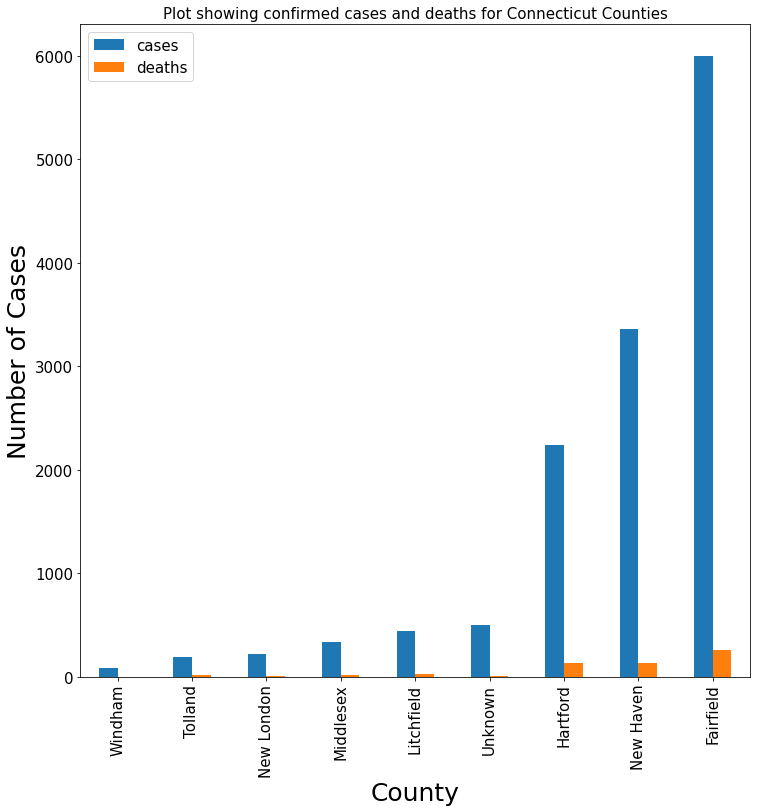

In [83]:
fig = plt.figure()
aggregated_df.plot.bar(figsize=(12,12))
plt.xlabel("County", fontsize=25)
plt.ylabel("Number of Cases", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Plot showing confirmed cases and deaths for Connecticut Counties", fontsize=15)
plt.legend(fontsize=15)
plt.show()

## Interactive Plotly Plots 

In [84]:

layout_bar = go.Layout(dict(
    title='Plot Showing Total Cases & Deaths in Connecticut Counties',
    xaxis=dict(
        title= "County",
    ),

    yaxis1=dict(
        title='Count',
    ),
))


figp = go.Figure(data=[
    go.Bar(name='Cases', x=aggregated_df.index, y=aggregated_df.cases),
    go.Bar(name='Deaths', x=aggregated_df.index, y=aggregated_df.deaths)
],
layout=layout_bar)

In [85]:
plot(figp, filename='plot_cases_deaths.html')

'plot_cases_deaths.html'

TODO:
1. Growth Rate (Take number of cases coming on each day and get the growth rate)
2. Try to plot all county cases in one plot and deaths in other
3. Plot gor growth rates (as numbers can have differnt ranges)
4. Ratio of cases and deaths.

## Interactive Line Charts Showing All Counties Cases and Deaths in Single plot

In [86]:
all_plots = []
for ind, county in enumerate(connecticut_df.county.unique()):
    tmp = connecticut_df[connecticut_df.county==county]
    tmp.index = pd.to_datetime(tmp.date)
    cases_line_plots = go.Scatter(
        name=county +' Cases',
        x=tmp.index,
        y=tmp.cases.values,
        line = dict(color = 'green'),
        mode='lines+markers',
        opacity = 0.5,
        legendgroup="group"+str(ind)
    )
    deaths_dotted_line_plots = go.Scatter(
        name=county+' Deaths',
        x=tmp.index,
        y=tmp.deaths,
        line=dict(color = 'red', dash='dot'),
        mode='lines+markers',
        legendgroup="group"+str(ind)
    )
    all_plots.append(cases_line_plots)
    all_plots.append(deaths_dotted_line_plots)

In [ ]:
layout_line_chart = go.Layout(dict(
    title='Plot Showing Total Cases & Deaths in Connecticut Counties',
    xaxis=dict(
        title= "County",
    ),

    yaxis1=dict(
        title='Count',
    ),
))


fig_line_chart = go.Figure(data=all_plots, layout=layout_line_chart)

In [75]:
plot(fig_line_chart, filename='plotly_line_chart.html')

'plotly_line_chart.html'